## Capstone Project, Hw8. 
#### Felicitas Ruiz
#### TFCB_2020

###### Data
Link to data

### Questions that I will ask in Python
###### 2. Continung with the theme of gender differences within disease groups, I wanted to see if there are also differences in care. For instance, are males more likely to receive chemotherapy than females in each adenocarcinoma disease group and in the hepatocellular carcinoma group? I will answer this question in Python.

###### 3. Continung with the theme of gender differences in this dataset, I wanted to investigate if there are gender preferences when using a specific diagnostic probe. Is the diagnostic probe biopsy more often used on females than males? if there are preferences, do these preferences hold with different disease groups.



I'll start with question 2:

In [228]:
#First start by importing pandas
import pandas as pd

In [229]:
# Read in files from Fisher's famous iris dataset, which contains anatomical data on a variety of flowers
# read_csv returns a pandas dataframe

#Full_pcbil_raw = pd.read_csv('data/pcbil_raw.csv')
#pcbil_clinicaldata_patientdata_messy = pd.read_csv('data/pcbil_clinicaldata_patientdata_cleanup.csv')
Filtered = pd.read_csv('data/pcbil_clinicaldata_PLOS_REVISION.csv')



In [230]:
Filtered.head(10)

,pad,person_number_anon,date_birth,gender,chemo,date_pad,type_probe,p_r,p_t,p_n,p_m,p_l,p_v,p_pn,date_death,comments
0,Ampulla Ac|124,PN1,3/5/1936,m,y,4/26/2005,r,0.0,3,1,NaN,NaN,NaN,NaN,4/13/2007,NaN
1,Ampulla Ac|173,PN2,11/10/1939,m,y,1/21/2010,r,0.0,1,0,x,1,0,NaN,8/30/2012,NaN
2,Ampulla Ac|177,PN3,5/27/1917,f,NaN,9/20/2005,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/28/2006,NaN
3,Ampulla Ac|200,PN4,5/29/1932,f,n,2/9/2012,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/16/2012,NaN
4,Ampulla Ac|225,PN5,11/23/1936,m,n,4/18/2011,r,0.0,2,0,x,1,0,NaN,8/14/2011,NaN
5,Ampulla Ac|235,PN6,11/23/1931,m,NaN,5/6/2009,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/11/2009,NaN
6,Ampulla Ac|237,PN7,6/5/1955,f,y,4/14/2008,r,NaN,1,0,NaN,NaN,NaN,NaN,2/3/2010,NaN
7,Ampulla Ac|241,PN8,8/11/1969,m,y,6/18/2009,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/22/2010,NaN
8,Ampulla Ac|254,PN9,1/1/1973,m,n,10/26/2009,r,0.0,3,1,x,0,0,NaN,NaN,NaN
9,Ampulla Ac|262,PN10,10/17/1923,f,n,8/27/2002,r,NaN,3,0,x,NaN,NaN,NaN,8/7/2014,NaN


In [231]:
#Here I am creating a dataframe from the read csv file
filter_df = pd.DataFrame(Filtered)

In [232]:
#WHAT I did here is split the objects in the pad column so that I could manipulate the data by disease
pad_column=filter_df["pad"]
#pad_column

pad_only_list=[]
pad_number_list=[]
for item in filter_df["pad"]:
    new_item=item.split("|")
    pad_only=new_item[0]
    pad_number=new_item[1]
    pad_only_list.append(pad_only)
    pad_number_list.append(pad_number)
#pad_number_list 
#pad_only_list

filter_df

,pad,person_number_anon,date_birth,gender,chemo,date_pad,type_probe,p_r,p_t,p_n,p_m,p_l,p_v,p_pn,date_death,comments
0,Ampulla Ac|124,PN1,3/5/1936,m,y,4/26/2005,r,0.0,3,1,NaN,NaN,NaN,NaN,4/13/2007,NaN
1,Ampulla Ac|173,PN2,11/10/1939,m,y,1/21/2010,r,0.0,1,0,x,1,0,NaN,8/30/2012,NaN
2,Ampulla Ac|177,PN3,5/27/1917,f,NaN,9/20/2005,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/28/2006,NaN
3,Ampulla Ac|200,PN4,5/29/1932,f,n,2/9/2012,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/16/2012,NaN
4,Ampulla Ac|225,PN5,11/23/1936,m,n,4/18/2011,r,0.0,2,0,x,1,0,NaN,8/14/2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Perihilary Ac|419,PN359,12/8/1975,m,NaN,6/27/2011,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/20/2012,NaN
387,Perihilary Ac|437,PN360,2/17/1932,f,n,12/10/2008,r,0.0,3,x,x,0,0,NaN,NaN,NaN
388,Perihilary Ac|6,PN361,4/13/1957,f,n,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,NaN,NaN
389,Perihilary Ac|7,PN361,4/13/1957,f,n,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,NaN,NaN


In [233]:
#Now I am adding the list of disease and number associate with that disease to a separate column
filter_df["pad_only"]=pad_only_list
filter_df["pad_number"]=pad_number_list

In [234]:
#Now that I added both the disease("pad_only") and pad number, I will drop the "pad" column
New_filter_df=filter_df.drop(columns=['pad'])
New_filter_df

,person_number_anon,date_birth,gender,chemo,date_pad,type_probe,p_r,p_t,p_n,p_m,p_l,p_v,p_pn,date_death,comments,pad_only,pad_number
0,PN1,3/5/1936,m,y,4/26/2005,r,0.0,3,1,NaN,NaN,NaN,NaN,4/13/2007,NaN,Ampulla Ac,124
1,PN2,11/10/1939,m,y,1/21/2010,r,0.0,1,0,x,1,0,NaN,8/30/2012,NaN,Ampulla Ac,173
2,PN3,5/27/1917,f,NaN,9/20/2005,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/28/2006,NaN,Ampulla Ac,177
3,PN4,5/29/1932,f,n,2/9/2012,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/16/2012,NaN,Ampulla Ac,200
4,PN5,11/23/1936,m,n,4/18/2011,r,0.0,2,0,x,1,0,NaN,8/14/2011,NaN,Ampulla Ac,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,PN359,12/8/1975,m,NaN,6/27/2011,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/20/2012,NaN,Perihilary Ac,419
387,PN360,2/17/1932,f,n,12/10/2008,r,0.0,3,x,x,0,0,NaN,NaN,NaN,Perihilary Ac,437
388,PN361,4/13/1957,f,n,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,NaN,NaN,Perihilary Ac,6
389,PN361,4/13/1957,f,n,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,NaN,NaN,Perihilary Ac,7


In [235]:
chemo_new=[]
l_new=['N/A' if x is np.nan else x for x in New_filter_df["chemo"]]
        
for items in l_new:

    if items == "Y":
        chemo_new.append(1)
    elif items == "y":
        chemo_new.append(1)
    else:
        chemo_new.append(0)
   # print(items)
#chemo_new

New_filter_df["Chemo (Yes=1, No or unknown=0)"]=chemo_new
New_filter_df_for_chemo=New_filter_df.drop(columns=['chemo'])

In [236]:
New_filter_df_for_chemo

,person_number_anon,date_birth,gender,date_pad,type_probe,p_r,p_t,p_n,p_m,p_l,p_v,p_pn,date_death,comments,pad_only,pad_number,"Chemo (Yes=1, No or unknown=0)"
0,PN1,3/5/1936,m,4/26/2005,r,0.0,3,1,NaN,NaN,NaN,NaN,4/13/2007,NaN,Ampulla Ac,124,1
1,PN2,11/10/1939,m,1/21/2010,r,0.0,1,0,x,1,0,NaN,8/30/2012,NaN,Ampulla Ac,173,1
2,PN3,5/27/1917,f,9/20/2005,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/28/2006,NaN,Ampulla Ac,177,0
3,PN4,5/29/1932,f,2/9/2012,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/16/2012,NaN,Ampulla Ac,200,0
4,PN5,11/23/1936,m,4/18/2011,r,0.0,2,0,x,1,0,NaN,8/14/2011,NaN,Ampulla Ac,225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,PN359,12/8/1975,m,6/27/2011,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/20/2012,NaN,Perihilary Ac,419,0
387,PN360,2/17/1932,f,12/10/2008,r,0.0,3,x,x,0,0,NaN,NaN,NaN,Perihilary Ac,437,0
388,PN361,4/13/1957,f,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,NaN,NaN,Perihilary Ac,6,0
389,PN361,4/13/1957,f,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,NaN,NaN,Perihilary Ac,7,0


## Here is where I will actually group by gender and count the number of patients that received chemo based on gender

In [237]:

Gender_chemo_by_disease=New_filter_df_for_chemo.groupby(["pad_only", "gender", "Chemo (Yes=1, No or unknown=0)"]).size()

Gender_chemo_by_disease

pad_only                         gender  Chemo (Yes=1, No or unknown=0)
Ampulla Ac                       f       0                                  7
                                         1                                  5
                                 m       0                                  5
                                         1                                  6
Distal Bile Duct Ac              f       0                                  1
                                         1                                  1
                                 m       0                                  2
                                         1                                  2
Gallbladder Ac                   f       0                                 16
                                         1                                 10
                                 m       0                                  4
                                         1                            

In [238]:
f_ratio= 2/11
f_ratio

0.18181818181818182

In [239]:
m_ratio=8/54
m_ratio

0.14814814814814814

Text(0, 0.5, 'Count')

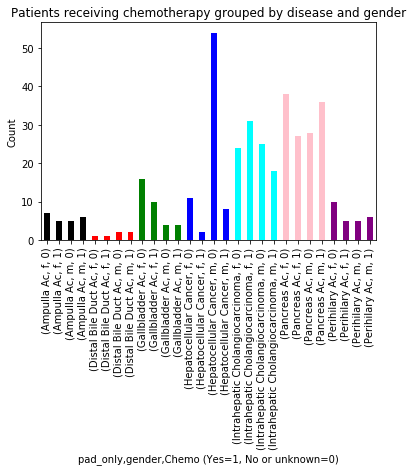

In [240]:
import matplotlib.pyplot as plt

Gender_chemo_by_disease.plot.bar(color=['black', 'black', 'black', 'black', 
                                        'red', 'red', 'red', 'red',
                                        'green','green', 'green', 'green',
                                        'blue', 'blue', 'blue', 'blue',
                                       'cyan', 'cyan', 'cyan', 'cyan',
                                       'pink', 'pink', 'pink', 'pink',
                                       'purple', 'purple', 'purple', 'purple',])
plt.title('Patients receiving chemotherapy grouped by disease and gender')
plt.ylabel('Count')

So here I will answer problem 2. I created a graph above called 'Patients receiving chemotherapy grouped by disease and gender'. By looking at the graph, we can see that in most cases, the number of patients that received chemotherapy based on gender within a disease group is pretty even. By this, I mean that females that do not receive chemotherapy in the Ampulla Adenocarcinoma disease group (indicated by "Ampulla Ac, f, 0") is about the same as those females that do (indicated by "Ampulla Ac, f, 1") and is also comparable to males that do not receive chemo (indicated by "Ampulla Ac, m, 0") and males that do receive chemo (indicated by "Ampulla Ac, m, 1"). 

But there are instances where this is not the case. For instance, in the Hepatocellular cancer group, there are more males that do not receive chemo (indicated by "Hepatocellular Cancer, m, 0") than males that do receive chemo (indicated by "Hepatocellular Cancer, m, 0"). There are also more females that do not receive chemo (indicated by "Hepatocellular Cancer, f, 0") than females that do receive chemo therapy. Compared to males, the ratio of females that do receive chemo to those that don't  is about the same ratio.
Overall, there does not appear to be major differences in those that do and don't receive chemotherapy based on gender and within each disease group. 


###### I'll continue with question 3 here. 



In [243]:
#Here I will group by disease, gender, and the type of probe used
Probe_series_by_disease=New_filter_df.groupby(["pad_only", "gender", "type_probe"]).size()
Probe_series_by_disease

pad_only                         gender  type_probe
Ampulla Ac                       f       b              6
                                         r              6
                                 m       b              3
                                         r              8
Distal Bile Duct Ac              f       b              1
                                         r              1
                                 m       r              4
Gallbladder Ac                   f       b             18
                                         r              8
                                 m       b              3
                                         r              5
Hepatocellular Cancer            f       b              4
                                         r              9
                                 m       b             43
                                         r             18
Intrahepatic Cholangiocarcinoma  f       b             41
                    

Text(0, 0.5, 'Count')

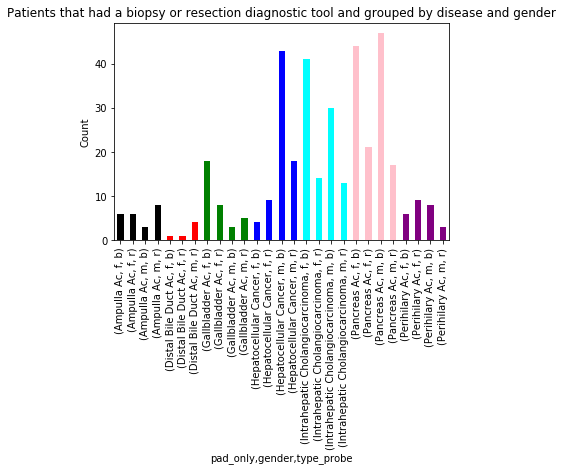

In [245]:
Probe_series_by_disease.plot.bar(color=['black', 'black', 'black', 'black', 
                                        'red', 'red', 'red', 
                                        'green','green', 'green', 'green',
                                        'blue', 'blue', 'blue', 'blue',
                                       'cyan', 'cyan', 'cyan', 'cyan',
                                       'pink', 'pink', 'pink', 'pink',
                                       'purple', 'purple', 'purple', 'purple',])
plt.title('Patients that had a biopsy or resection diagnostic tool and grouped by disease and gender')
plt.ylabel('Count')

In [248]:
Probe_series_by_gender=New_filter_df.groupby([ "gender", "type_probe"]).size()
Probe_series_by_gender

gender  type_probe
f       b             120
        r              68
m       b             134
        r              68
dtype: int64

Text(0, 0.5, 'Count')

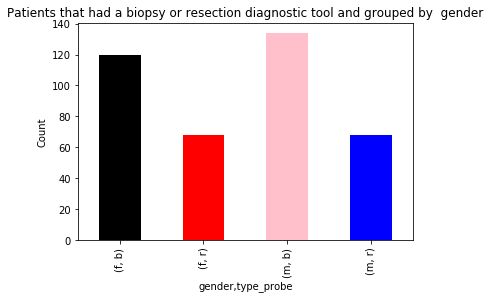

In [247]:
Probe_series_by_gender.plot.bar(color=['black', 'red', 'pink', 'blue' 
                                        ])
plt.title('Patients that had a biopsy or resection diagnostic tool and grouped by  gender')
plt.ylabel('Count')

Answer to question 3:
Just looking at gender within a specific disease group, it does appear as though there is a higher number of females that underwent a biopsy than resection as a diagnotic tool within each disease group. This is especially apparent by looking at both the Hepatocellular Cancer group and the Pancrease Adenocarcinoma group. This trend is also similar with males. There is a higher number of males that underwent a biopsy than resection as a diagnotic tool within each disease group. It is difficult to say if there are gender-specific preferences when using a specific diagnostic probe within each disease group since there is an uneven amount of females and males in each group. If you do not subset by disease, it looks as though there are not gender-specific preferences when using a specific diagnostic probe. This can be seen in the 'Probe_series_by_gender' Series as well as in the 'Patients that had a biopsy or resection diagnostic tool and grouped by  gender' bar graph. 

#Here I wanted to add age column to my dataset for problem 1 in R. But I didn't know quite how to do it in R so I did it in python. I then saved the new datset that now has a new column to a 'Filtered_edit_df.csv'

In [134]:

Filtered_edited = pd.read_csv('data/pcbil_clinicaldata_PLOS_REVISION_edited.csv')
Filtered_edit_df= pd.DataFrame(Filtered_edited)
lengthy=len(Filtered_edit_df["date_birth"])


import datetime
import dateutil

In [ ]:
birth_list=[]
for date in Filtered_edit_df["date_birth"]:
    numba=date.split("/")
    birth_date = datetime.date(int(numba[2]), int(numba[0]), int(numba[1]))
    birth_list.append(birth_date)

In [138]:
death_list=[]
for Dx in Filtered_edit_df["date_death"]:
    if Dx != "Present":
        numba2=Dx.split("/")
        end_date = datetime.date(int(numba2[2]), int(numba2[0]), int(numba2[1]))
        
    else:
        end_date = datetime.date(2016, 8, 1)
        
    death_list.append(end_date)


In [139]:
time_difference_list=[]
for counting in range(lengthy):
    time_difference=death_list[counting] - birth_list[counting]
    age = time_difference.days
    time_difference_list.append(age)


In [ ]:
Filtered_edit_df["Age (in days)"]=time_difference_list
Filtered_edit_df

In [157]:
Filtered_edit_df["pad_only"]=pad_only_list
Filtered_edit_df["pad_number"]=pad_number_list

In [158]:
Filtered_edit_df

,pad,person_number_anon,date_birth,gender,chemo,date_pad,type_probe,p_r,p_t,p_n,p_m,p_l,p_v,p_pn,date_death,comments,Age (in days),pad_only,pad_number
0,Ampulla Ac|124,PN1,3/5/1936,m,y,4/26/2005,r,0.0,3,1,NaN,NaN,NaN,NaN,4/13/2007,NaN,25971,Ampulla Ac,124
1,Ampulla Ac|173,PN2,11/10/1939,m,y,1/21/2010,r,0.0,1,0,x,1,0,NaN,8/30/2012,NaN,26592,Ampulla Ac,173
2,Ampulla Ac|177,PN3,5/27/1917,f,NaN,9/20/2005,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/28/2006,NaN,32508,Ampulla Ac,177
3,Ampulla Ac|200,PN4,5/29/1932,f,n,2/9/2012,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/16/2012,NaN,29421,Ampulla Ac,200
4,Ampulla Ac|225,PN5,11/23/1936,m,n,4/18/2011,r,0.0,2,0,x,1,0,NaN,8/14/2011,NaN,27292,Ampulla Ac,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Perihilary Ac|419,PN359,12/8/1975,m,NaN,6/27/2011,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/20/2012,NaN,13374,Perihilary Ac,419
387,Perihilary Ac|437,PN360,2/17/1932,f,n,12/10/2008,r,0.0,3,x,x,0,0,NaN,Present,NaN,30847,Perihilary Ac,437
388,Perihilary Ac|6,PN361,4/13/1957,f,n,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,Present,NaN,21660,Perihilary Ac,6
389,Perihilary Ac|7,PN361,4/13/1957,f,n,11/28/2011,r,0.0,2,0,NaN,0,0,1.0,Present,NaN,21660,Perihilary Ac,7


In [159]:
import numpy as np
#numpy_array = Filtered_edit_df.to_numpy()
#np.savetxt("Filtered_edit_df.txt", numpy_array, fmt = "%d")

Filtered_edit_df.to_csv(r'data/Filtered_edit_df.csv', index = False)